# Assignment 1
#### Murashko Artem | SD20-01 | ar.murashko@innopolis.university
----

#### Import the libraries

In [130]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

#### Loading data

In [131]:
data = pd.read_csv('a1_dataset.csv')
data

,target,var1,var2,var3,var4,var5,var6,var7
0,0,509.18,417.681,Micronesia,138.0,393.00,no,2019-07-20 13:21:37
1,0,446.06,666.182,Dominica,81.0,352.05,yes,2019-04-04 21:30:46
2,1,235.50,398.097,Isle of Man,90.0,339.00,no,2019-03-03 02:59:37
3,0,306.02,518.163,Turkmenistan,102.0,439.25,yes,2019-03-19 08:00:58
4,0,453.08,600.156,Cameroon,105.0,422.95,no,2019-03-18 13:22:35
...,...,...,...,...,...,...,...,...
920,0,422.34,547.259,Belarus,NaN,350.45,yes,2019-01-22 12:58:14
921,1,342.62,473.919,Japan,NaN,200.85,no,2019-02-01 14:37:34
922,1,265.10,538.170,Saint Martin,NaN,208.35,yes,2019-06-13 18:50:00
923,0,397.12,622.386,Chad,NaN,433.45,yes,2019-05-27 06:19:27


## Preprocessing
### Encoding categorical values

I will use Ordinal encoding technique for var3 and var6.\
And for now I will delete var7.

In [132]:
encoder = OrdinalEncoder()
data['var3'] = encoder.fit_transform(data.loc[:, ['var3']])
data['var6'] = encoder.fit_transform(data.loc[:, ['var6']])
data = data.drop('var7', axis=1)

Let's see our encoded dataset:

In [133]:
data

,target,var1,var2,var3,var4,var5,var6
0,0,509.18,417.681,137.0,138.0,393.00,0.0
1,0,446.06,666.182,57.0,81.0,352.05,1.0
2,1,235.50,398.097,101.0,90.0,339.00,0.0
3,0,306.02,518.163,216.0,102.0,439.25,1.0
4,0,453.08,600.156,36.0,105.0,422.95,0.0
...,...,...,...,...,...,...,...
920,0,422.34,547.259,19.0,NaN,350.45,1.0
921,1,342.62,473.919,105.0,NaN,200.85,0.0
922,1,265.10,538.170,179.0,NaN,208.35,1.0
923,0,397.12,622.386,41.0,NaN,433.45,1.0


### Data imputation

Let's find missing values for var4. \
Firstly, I need to define features and target, and scale the data:

In [134]:
features_cols = ['target', 'var1', 'var2', 'var3', 'var5', 'var6']
target_col = ['var4']

data[['var1', 'var2', 'var4', 'var3', 'var5']] = StandardScaler().fit_transform(data[['var1', 'var2', 'var4', 'var3', 'var5']])
data

,target,var1,var2,var3,var4,var5,var6
0,0,1.697391,-0.967153,0.321166,1.124118,0.857726,0.0
1,0,0.978641,0.871575,-0.828074,-1.044401,0.338188,1.0
2,1,-1.419013,-1.112060,-0.195992,-0.702003,0.172622,0.0
3,0,-0.616000,-0.223659,1.456041,-0.245473,1.444505,1.0
4,0,1.058578,0.383030,-1.129750,-0.131340,1.237705,0.0
...,...,...,...,...,...,...,...
920,0,0.708541,-0.008370,-1.373963,NaN,0.317889,1.0
921,1,-0.199234,-0.551033,-0.138530,NaN,-1.580103,0.0
922,1,-1.081957,-0.075622,0.924517,NaN,-1.484950,1.0
923,0,0.421360,0.547516,-1.057922,NaN,1.370919,1.0


Now I need to extract only not null rows from dataset:

In [135]:
data_not_null = data[data[target_col].var4.notnull()]

X = data_not_null[features_cols]
y = data_not_null[target_col]

#### Linear regression model

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Linear regression performance evaluation:

In [137]:
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7177117604024913
Mean Squared Error: 0.8529376636275989
Root Mean Squared Error: 0.9235462433617491


#### Polynomial regression model

In [138]:
def apply_polynomial_regresssion(X, y, degree):
    X = X.copy()
    y = y.copy()
    
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    X = polynomial_features.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    
    y_pred = regressor.predict(X_test)
    print('Polynomial Regression with degree:', degree)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('------------')

Above is the function that takes X, y and apply \
Polnomial regression of specified degree.

Let's test with degree 1, 2, 3 and 4.\
(Actually Polynomial regression with degree 1 is the Linear regression)

In [139]:
degrees = [1, 2, 3, 4]
for degree in degrees: 
    apply_polynomial_regresssion(X, y, degree)

Polynomial Regression with degree: 1
Mean Absolute Error: 0.7177117604024913
Mean Squared Error: 0.8529376636275987
Root Mean Squared Error: 0.9235462433617488
------------
Polynomial Regression with degree: 2
Mean Absolute Error: 0.6882683769181983
Mean Squared Error: 0.87410610352433
Root Mean Squared Error: 0.9349364168350327
------------
Polynomial Regression with degree: 3
Mean Absolute Error: 0.7176188298487646
Mean Squared Error: 1.0426858831957317
Root Mean Squared Error: 1.0211199161683862
------------
Polynomial Regression with degree: 4
Mean Absolute Error: 1.1027561967185728
Mean Squared Error: 3.2732048319784184
Root Mean Squared Error: 1.8092000530561618
------------


As we can see Polynomial regression with degree 2 is the most optimal regression model, because with degree 3 it's become worse. Thus, I will use degree 2.

But for now I will train on whole available data set, becuase 
1. I do not need to test, since I know optimal regression model
3. Data set is small

In [140]:
X = data[features_cols]
y = data[target_col]

polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
X = polynomial_features.fit_transform(X)

X_train = X[y[target_col].var4.notnull()]
y_train = y[y[target_col].var4.notnull()]

regressor = LinearRegression()
regressor.fit(X_train, y_train)

data_null_indexes = data[data[target_col].var4.isnull()].index
for index in data_null_indexes:
    y.at[index, 'var4'] = regressor.predict([X[index]])

At this step, I've found missing values and substitue them into initial dataset.

In [141]:
data[target_col] = y
data

,target,var1,var2,var3,var4,var5,var6
0,0,1.697391,-0.967153,0.321166,1.124118,0.857726,0.0
1,0,0.978641,0.871575,-0.828074,-1.044401,0.338188,1.0
2,1,-1.419013,-1.112060,-0.195992,-0.702003,0.172622,0.0
3,0,-0.616000,-0.223659,1.456041,-0.245473,1.444505,1.0
4,0,1.058578,0.383030,-1.129750,-0.131340,1.237705,0.0
...,...,...,...,...,...,...,...
920,0,0.708541,-0.008370,-1.373963,-1.509657,0.317889,1.0
921,1,-0.199234,-0.551033,-0.138530,0.231858,-1.580103,0.0
922,1,-1.081957,-0.075622,0.924517,0.579769,-1.484950,1.0
923,0,0.421360,0.547516,-1.057922,0.035454,1.370919,1.0


### Implementing the PCA technique

In [142]:
features_cols = ['var1', 'var2', 'var3', 'var4', 'var5', 'var6']
target_col = ['target']

features = data[features_cols]
target = data[target_col]

Let's reduce data to 2 compontents.

General steps:
1. Transform the data to have zero mean by subtracting mean from each point
2. Compute the sample covariance matrix C
3. Find p (eigenvector, eigenvalue) pairs of C
4. Find the eigenvectors corresponding to d highest eigenvalues w_1, w_2, ..., w_d
5. Compute X' as X' = XW, where W = [w_1, w_2, ..., w_d]



In [143]:
def my_PCA(features, n_components):
    features_copy = features.copy()
    features_scaled = features_copy - np.mean(features_copy, axis = 0)

    cov_mat = np.cov(features_scaled.T)
    eig_val, eig_vec = np.linalg.eigh(cov_mat)

    idx = np.argsort(eig_val)[::-1]

    eig_val_sorted = eig_val[idx]
    eig_vec_sorted = eig_vec[:, idx]

    W = eig_vec_sorted[:, :n_components]
    features_reduced = features_scaled @ W
    
    return features_reduced

*Reduce to one dimension:*

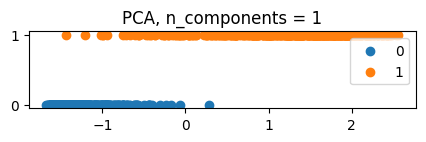

In [144]:
x = my_PCA(features, 1)

target_0_rows = x.loc[target['target'] == 0.0]
target_1_rows = x.loc[target['target'] == 1.0]

fig = plt.figure(figsize=(5, 1))
ax = fig.add_subplot(111)
ax.set_title('PCA, n_components = 1')
ax.scatter(target_0_rows[0], np.zeros(len(target_0_rows)), label='0')
ax.scatter(target_1_rows[0], np.ones(len(target_1_rows)), label='1')
ax.legend()

plt.show()

*Reduce to two dimensions:*

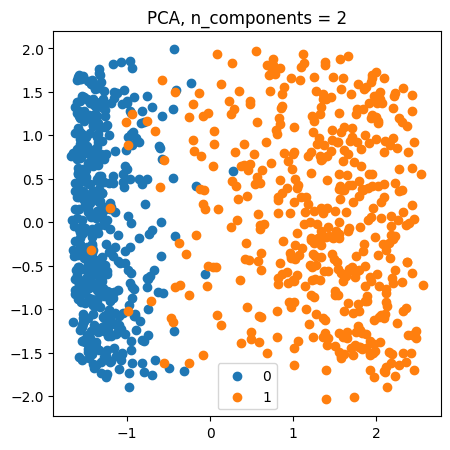

In [145]:
x = my_PCA(features, 2)

# from sklearn.decomposition import PCA
# pca = PCA(n_components = 2)
# print(pca.fit_transform(features))


target_0_rows = x.loc[target['target'] == 0.0]
target_1_rows = x.loc[target['target'] == 1.0]

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.set_title('PCA, n_components = 2')
ax.scatter(target_0_rows[0], target_0_rows[1], label='0')
ax.scatter(target_1_rows[0], target_1_rows[1], label='1')

ax.legend()

plt.show()

## Training
### Split dataset

In [146]:
features_cols = ['var1', 'var2', 'var3', 'var4', 'var5', 'var6']
target_col = ['target']
pca_n_components = [1,2,3]

features = data[features_cols]
target = data[target_col[0]]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Logistic Regression

In [147]:
params = {
    'penalty':['none', 'l2'],
    'C': np.linspace(0, 1, 10),
}

grid_search_logreg = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid = params,
    cv = 3,
    scoring='accuracy'
)

grid_search_logreg.fit(X_train, y_train)
y_pred = grid_search_logreg.predict(X_test)

logreg_accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Logistic Regression | No PCA | accuracy =", logreg_accuracy)
print("Best hyperparameters:", grid_search_logreg.best_params_)

for component in pca_n_components:
    x = my_PCA(features, component)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(x, target, test_size=0.2, random_state=42)

    grid_search_logreg.fit(X_train_pca, y_train_pca)
    y_pred = grid_search_logreg.predict(X_test_pca)

    logreg_accuracy = metrics.accuracy_score(y_test_pca, y_pred)
    print(f"Logistic Regression | PCA_n_component = {component} | accuracy =", logreg_accuracy)
    print("Best hyperparameters:", grid_search_logreg.best_params_)

Logistic Regression | No PCA | accuracy = 0.9891891891891892
Best hyperparameters: {'C': 0.0, 'penalty': 'none'}
Logistic Regression | PCA_n_component = 1 | accuracy = 0.9837837837837838
Best hyperparameters: {'C': 0.0, 'penalty': 'none'}
Logistic Regression | PCA_n_component = 2 | accuracy = 0.972972972972973
Best hyperparameters: {'C': 0.2222222222222222, 'penalty': 'l2'}
Logistic Regression | PCA_n_component = 3 | accuracy = 0.9837837837837838
Best hyperparameters: {'C': 0.7777777777777777, 'penalty': 'l2'}


### K-Nearest Neighbor

In [148]:
params = {
    'n_neighbors':list(range(1, 11)),
    'weights':['uniform', 'distance'],
    'metric':['euclidean', 'manhattan', 'chebyshev', 'cosine']
}

grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=params,
    cv=3,
    scoring='accuracy'
)

grid_search_knn.fit(X_train, y_train)
y_pred = grid_search_knn.predict(X_test)

knn_accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"K-Nearest Neighbor accuracy | No PCA | accuracy =", knn_accuracy)
print("Best hyperparameters:", grid_search_knn.best_params_)

for component in pca_n_components:
    x = my_PCA(features, component)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(x, target, test_size=0.2, random_state=42)

    grid_search_knn.fit(X_train_pca, y_train_pca)
    y_pred = grid_search_knn.predict(X_test_pca)

    knn_accuracy = metrics.accuracy_score(y_test_pca, y_pred)
    print(f"K-Nearest Neighbor accuracy | PCA_n_component = {component} | accuracy =", knn_accuracy)
    print("Best hyperparameters:", grid_search_knn.best_params_)

K-Nearest Neighbor accuracy | No PCA | accuracy = 0.972972972972973
Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
K-Nearest Neighbor accuracy | PCA_n_component = 1 | accuracy = 0.9837837837837838
Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
K-Nearest Neighbor accuracy | PCA_n_component = 2 | accuracy = 0.9783783783783784
Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
K-Nearest Neighbor accuracy | PCA_n_component = 3 | accuracy = 0.9675675675675676
Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}


### Naive Bayes

In [149]:
nb_regressor = GaussianNB()
nb_regressor.fit(X_train, y_train)

scores = cross_val_score(
    nb_regressor, 
    X_test, 
    y_test,
    cv=3,
    scoring='accuracy'
)

nb_accuracy = np.mean(scores)
print(f"Naive Bayes | No PCA | accuracy =", nb_accuracy)

for component in pca_n_components:
    x = my_PCA(features, component)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(x, target, test_size=0.2, random_state=42)
    
    nb_regressor.fit(X_train_pca, y_train_pca)
    scores = cross_val_score(
        nb_regressor, 
        X_test_pca, 
        y_test_pca,
        cv=3,
        scoring='accuracy'
    )

    nb_accuracy = np.mean(scores)
    print(f"Naive Bayes | PCA_n_component = {component} | accuracy =", nb_accuracy)

Naive Bayes | No PCA | accuracy = 0.9838709677419355
Naive Bayes | PCA_n_component = 1 | accuracy = 0.9731182795698925
Naive Bayes | PCA_n_component = 2 | accuracy = 0.978494623655914
Naive Bayes | PCA_n_component = 3 | accuracy = 0.9731182795698925


### Conclusion

Results shows that Logistic Regression without PCA component is the best. 
